linear model


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv("고냉지배추최종.csv")
# DATE를 datetime 형식으로 변환
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')

In [9]:
df.head()

,DATE,평균가격,총거래물량,평균기온(°C),최저기온(°C),최고기온(°C),평균 풍속(m/s),평균 상대습도(%),합계 일조시간(hr),평균 지면온도(°C),일강수량(mm),농협가락(공),대아청과,서울청과,한국청과,생산자물가지수,소비자물가지수
0,2023-10-02,11500.0,7100.0,21.1,15.5,27.9,1.4,87.3,9.2,27.4,0.0,0,0,0,1,121.93,127.69
1,2023-09-28,13881.0,37130.0,20.8,18.0,26.3,1.8,91.0,8.1,25.3,0.0,0,1,0,0,159.44,132.54
2,2023-09-28,9168.0,9400.0,22.6,19.4,28.1,1.4,83.6,6.8,27.1,0.0,0,1,0,0,159.44,132.54
3,2023-09-27,5816.0,259260.0,24.3,23.1,26.6,1.1,86.4,1.3,26.0,0.0,0,1,0,0,159.44,132.54
4,2023-09-27,12734.0,150320.0,20.9,18.6,25.5,1.5,92.9,2.4,25.3,0.0,0,1,0,0,159.44,132.54


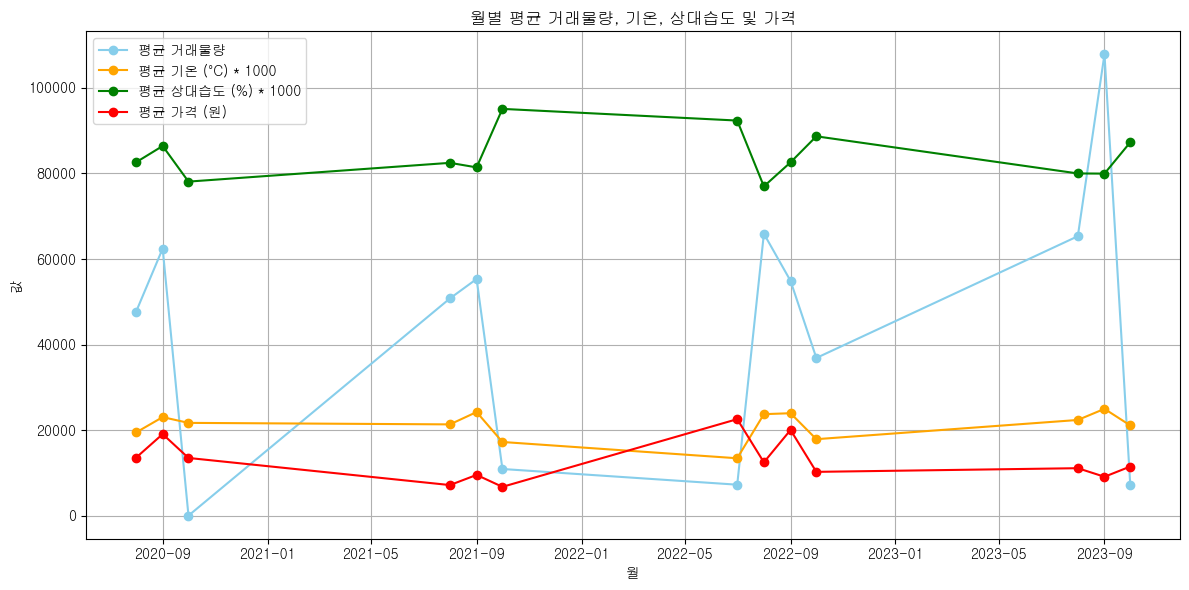

In [12]:
import pandas as pd
import matplotlib.pyplot as plt



# 날짜를 datetime 형식으로 변환
df['DATE'] = pd.to_datetime(df['DATE'])

# 월별로 그룹화하여 평균 계산
monthly_summary = df.groupby(df['DATE'].dt.to_period('M')).agg({
    '총거래물량': 'mean',
    '평균기온(°C)': 'mean',
    '평균 상대습도(%)': 'mean',
    '평균가격': 'mean'
}).reset_index()

# 결과 출력
monthly_summary['DATE'] = monthly_summary['DATE'].dt.to_timestamp()  # Period를 Timestamp로 변환

# 시각화
plt.figure(figsize=(12, 6))

# 평균 거래물량
plt.plot(monthly_summary['DATE'], monthly_summary['총거래물량'], marker='o', color='skyblue', label='평균 거래물량')

# 평균 기온
plt.plot(monthly_summary['DATE'], monthly_summary['평균기온(°C)'] * 1000, marker='o', color='orange', label='평균 기온 (°C) * 1000')

# 평균 상대습도
plt.plot(monthly_summary['DATE'], monthly_summary['평균 상대습도(%)'] * 1000, marker='o', color='green', label='평균 상대습도 (%) * 1000')

# 평균 가격
plt.plot(monthly_summary['DATE'], monthly_summary['평균가격'], marker='o', color='red', label='평균 가격 (원)')

# 레이블 및 제목 설정
plt.title('월별 평균 거래물량, 기온, 상대습도 및 가격')
plt.xlabel('월')
plt.ylabel('값')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


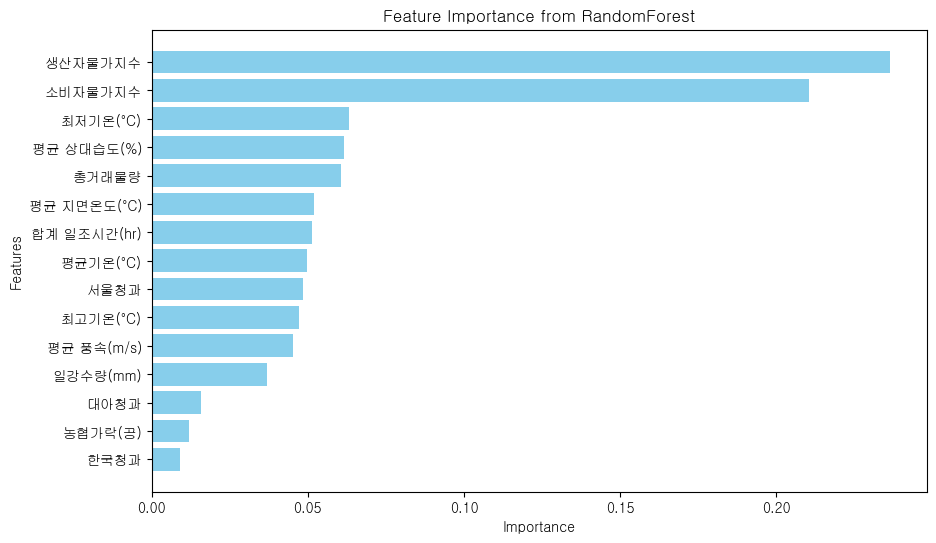

Top 5 Features - Test R-squared: 0.4621
Top 10 Features - Test R-squared: 0.6003
Top 15 Features - Test R-squared: 0.6538

Best Number of Features: 15
Best Test R-squared with 15 Features: 0.6538

Final Model Metrics:
Train R-squared: 0.9439, RMSE: 1515.0998, MAE: 1107.3375
Test R-squared: 0.6538, RMSE: 3780.4978, MAE: 2769.0825


In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('고냉지배추최종.csv')  # Replace with your actual file path

# Drop 'DATE' and specific columns for features and target
features = data.drop(columns=['DATE', '평균가격'])
target = data['평균가격']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# StandardScaler 적용
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# 하이퍼파라미터 설정
param_grid_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [6, 8, 10, 12, None],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# RandomForest 모델
rf_model = RandomForestRegressor(random_state=42)

# GridSearchCV 설정
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=10,
    n_jobs=-1,
    scoring='r2'
)

# 모델 학습
grid_search_rf.fit(scaled_X_train, y_train)

# 최적 모델 및 Feature Importance 추출
best_rf_model = grid_search_rf.best_estimator_
importances = best_rf_model.feature_importances_
feature_names = features.columns

# Feature Importance DataFrame 생성
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Feature Importance 시각화
plt.rc('font', family='Gulim')  # Windows의 경우

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Feature Importance from RandomForest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# 상위 변수 개수별 성능 평가
best_n = 0
best_test_r2 = -np.inf

for n in range(5, len(features.columns) + 1, 5):  # 상위 5, 10, 15, ..., 모든 변수
    top_features = importance_df['Feature'].head(n)
    X_train_reduced = X_train[top_features]
    X_test_reduced = X_test[top_features]

    # 데이터 스케일링
    scaled_X_train_reduced = scaler.fit_transform(X_train_reduced)
    scaled_X_test_reduced = scaler.transform(X_test_reduced)

    # 모델 재학습
    rf_model_reduced = RandomForestRegressor(random_state=42)
    rf_model_reduced.fit(scaled_X_train_reduced, y_train)

    # 테스트 성능 평가
    test_predictions_reduced = rf_model_reduced.predict(scaled_X_test_reduced)
    test_r2_reduced = r2_score(y_test, test_predictions_reduced)

    print(f"Top {n} Features - Test R-squared: {test_r2_reduced:.4f}")

    # 최적 변수 개수 및 성능 저장
    if test_r2_reduced > best_test_r2:
        best_n = n
        best_test_r2 = test_r2_reduced
        best_model_reduced = rf_model_reduced  # 최적 모델 저장

print(f"\nBest Number of Features: {best_n}")
print(f"Best Test R-squared with {best_n} Features: {best_test_r2:.4f}")

# 최종 모델 성능 평가
X_train_final = X_train[importance_df['Feature'].head(best_n)]
X_test_final = X_test[importance_df['Feature'].head(best_n)]
scaled_X_train_final = scaler.fit_transform(X_train_final)
scaled_X_test_final = scaler.transform(X_test_final)

train_predictions_final = best_model_reduced.predict(scaled_X_train_final)
test_predictions_final = best_model_reduced.predict(scaled_X_test_final)

final_train_r2 = r2_score(y_train, train_predictions_final)
final_train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions_final))
final_train_mae = mean_absolute_error(y_train, train_predictions_final)

final_test_r2 = r2_score(y_test, test_predictions_final)
final_test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions_final))
final_test_mae = mean_absolute_error(y_test, test_predictions_final)

print("\nFinal Model Metrics:")
print(f"Train R-squared: {final_train_r2:.4f}, RMSE: {final_train_rmse:.4f}, MAE: {final_train_mae:.4f}")
print(f"Test R-squared: {final_test_r2:.4f}, RMSE: {final_test_rmse:.4f}, MAE: {final_test_mae:.4f}")

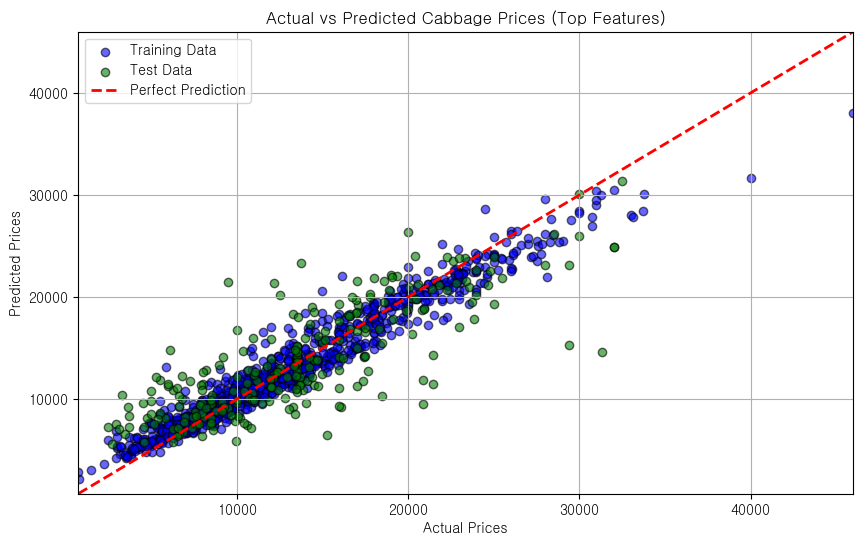

[0.23638418 0.21043891 0.06330851 0.0614349  0.06055673 0.05193872
 0.05140284 0.04961399 0.04852937 0.04714327 0.04533116 0.03701969
 0.01583309 0.01202183 0.00904282]
['생산자물가지수' '소비자물가지수' '최저기온(°C)' '평균 상대습도(%)' '총거래물량' '평균 지면온도(°C)'
 '합계 일조시간(hr)' '평균기온(°C)' '서울청과' '최고기온(°C)' '평균 풍속(m/s)' '일강수량(mm)' '대아청과'
 '농협가락(공)' '한국청과']


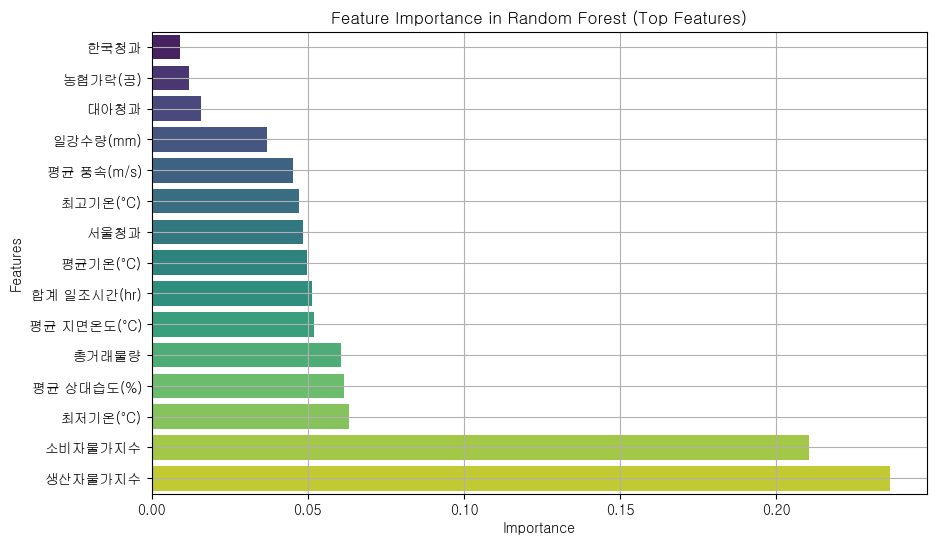

In [6]:
# 한국어 폰트 설정 (Windows의 경우)
plt.rc('font', family='Gulim')

# 시각화: 실제 값 vs 예측 값
plt.figure(figsize=(10, 6))

# 훈련 데이터 시각화
plt.scatter(y_train, train_predictions_final, alpha=0.6, color='blue', label='Training Data', edgecolors='k')

# 테스트 데이터 시각화
plt.scatter(y_test, test_predictions_final, alpha=0.6, color='green', label='Test Data', edgecolors='k')

# y=x 선 추가
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
         'r--', lw=2, label='Perfect Prediction')

# 그래프 제목 및 레이블 설정
plt.title('Actual vs Predicted Cabbage Prices (Top Features)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.xlim(y_train.min(), y_train.max())
plt.ylim(y_train.min(), y_train.max())
plt.legend()
plt.grid()

# 그래프 출력
plt.show()

# 가중치 시각화: 상위 피처 중요도
importance_values = importance_df['Importance'].values  # 중요도 값
feature_names = importance_df['Feature'].values  # 상위 중요도 피처 이름
print(importance_values)
print(feature_names)
# 가중치를 크기별로 오름차순 정리
sorted_indices = np.argsort(importance_values)  # 중요도 값의 인덱스를 정렬
sorted_weights = importance_values[sorted_indices]  # 정렬된 중요도 값
sorted_feature_names = feature_names[sorted_indices]  # 정렬된 특성 이름

# 정렬된 가중치 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_weights, y=sorted_feature_names, palette='viridis')
plt.title('Feature Importance in Random Forest (Top Features)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid()
plt.show()


<Axes: >

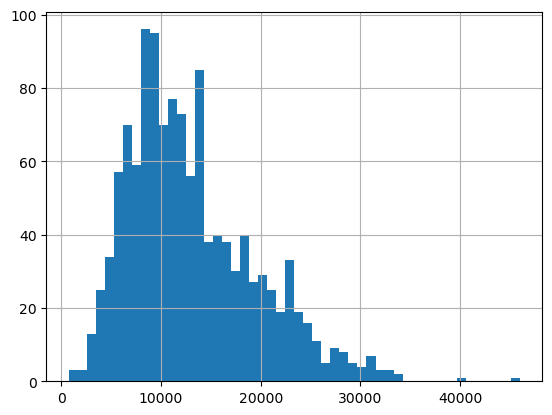

In [3]:
df['평균가격'].hist(bins=50)

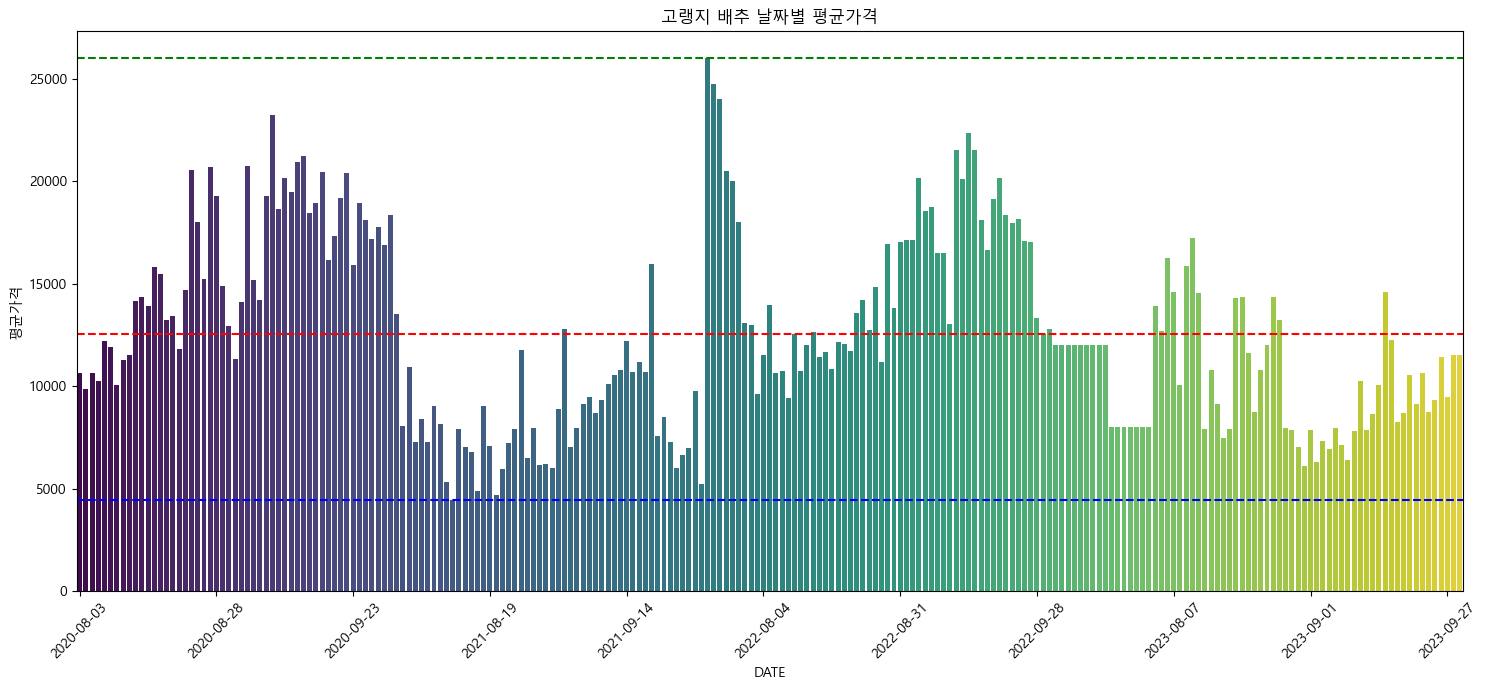

In [105]:
mean_prices = df.groupby('DATE')['평균가격'].mean().reset_index()

plt.rc('font', family='Malgun Gothic')  # Windows의 경우

# 시각화
plt.figure(figsize=(15, 7))
sns.barplot(x='DATE', y='평균가격', data=mean_prices, palette='viridis')
plt.title('고랭지 배추 날짜별 평균가격')
plt.xlabel('DATE')
plt.ylabel('평균가격')

# 평균가격, 최솟값, 최댓값 계산
average_price = mean_prices['평균가격'].mean()
min_price = mean_prices['평균가격'].min()
max_price = mean_prices['평균가격'].max()

# 평균가격, 최솟값, 최댓값을 기준으로 가로선 추가
plt.axhline(y=average_price, color='red', linestyle='--', label='평균가격')
plt.axhline(y=min_price, color='blue', linestyle='--', label='최솟값')
plt.axhline(y=max_price, color='green', linestyle='--', label='최댓값')


# X축 레이블 간격 조정
# 날짜가 불규칙할 경우, 특정 날짜만 선택하여 레이블을 줄임
num_labels = 10  # 표시할 레이블 수
plt.xticks(ticks=range(0, len(mean_prices), len(mean_prices) // num_labels), 
           labels=mean_prices['DATE'][::len(mean_prices) // num_labels].dt.strftime('%Y-%m-%d'), 
           rotation=45)  # 날짜 형식 변경 및 회전

plt.tight_layout()  # 레이아웃 조정
plt.show()

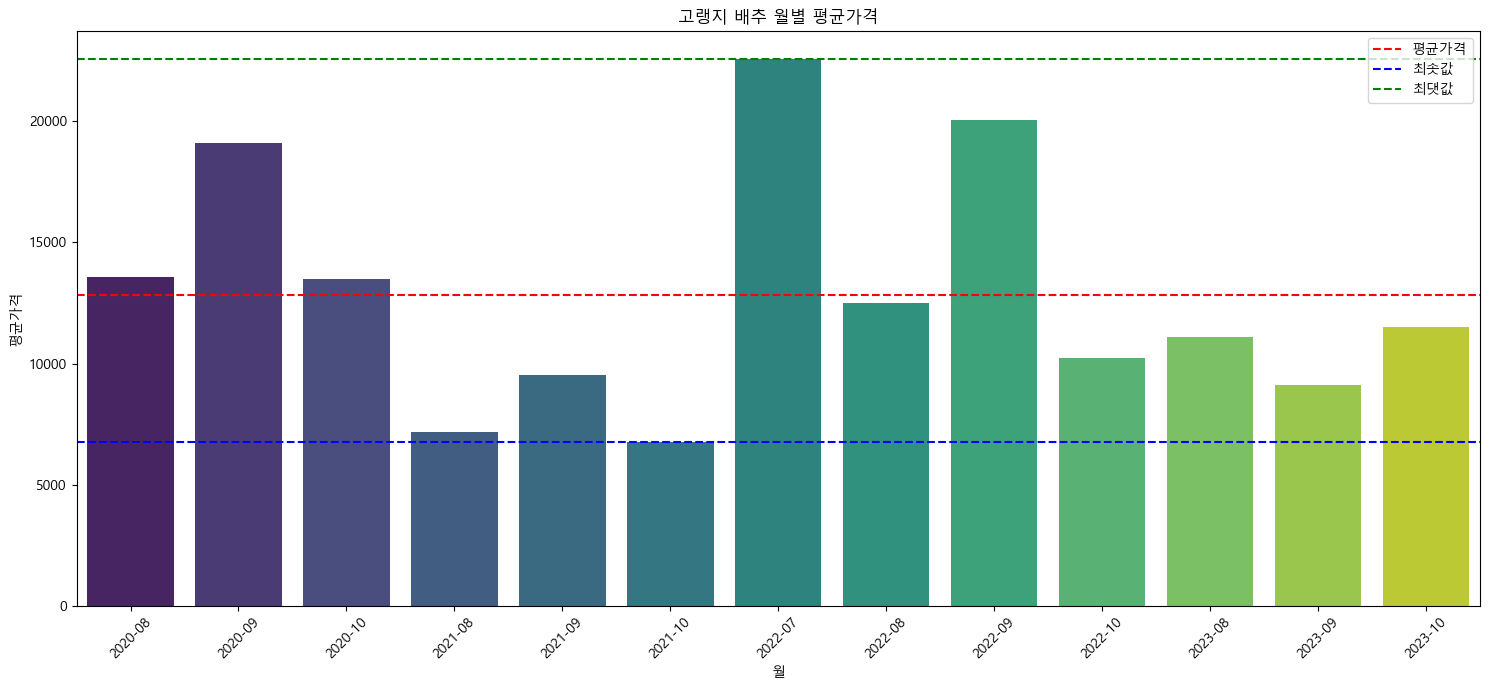

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터프레임 생성 (예시)
# df = pd.read_csv('your_data.csv')  # 실제 데이터 로드

# DATE 열을 datetime 형식으로 변환
df['DATE'] = pd.to_datetime(df['DATE'])

# 월별 평균가격 계산
df['월'] = df['DATE'].dt.to_period('M')  # 월 단위로 변환
monthly_mean_prices = df.groupby('월')['평균가격'].mean().reset_index()

# 월을 datetime 형식으로 변환하여 시각화에 사용
monthly_mean_prices['월'] = monthly_mean_prices['월'].dt.to_timestamp()

plt.rc('font', family='Malgun Gothic')  # Windows의 경우

# 시각화
plt.figure(figsize=(15, 7))
sns.barplot(x='월', y='평균가격', data=monthly_mean_prices, palette='viridis')
plt.title('고랭지 배추 월별 평균가격')
plt.xlabel('월')
plt.ylabel('평균가격')

# 평균가격, 최솟값, 최댓값 계산
average_price = monthly_mean_prices['평균가격'].mean()
min_price = monthly_mean_prices['평균가격'].min()
max_price = monthly_mean_prices['평균가격'].max()

# 평균가격, 최솟값, 최댓값을 기준으로 가로선 추가
plt.axhline(y=average_price, color='red', linestyle='--', label='평균가격')
plt.axhline(y=min_price, color='blue', linestyle='--', label='최솟값')
plt.axhline(y=max_price, color='green', linestyle='--', label='최댓값')

# X축 레이블 수동 설정
plt.xticks(ticks=range(len(monthly_mean_prices)), labels=[date.strftime('%Y-%m') for date in monthly_mean_prices['월']], rotation=45)

plt.legend()  # 범례 추가
plt.tight_layout()  # 레이아웃 조정
plt.show()


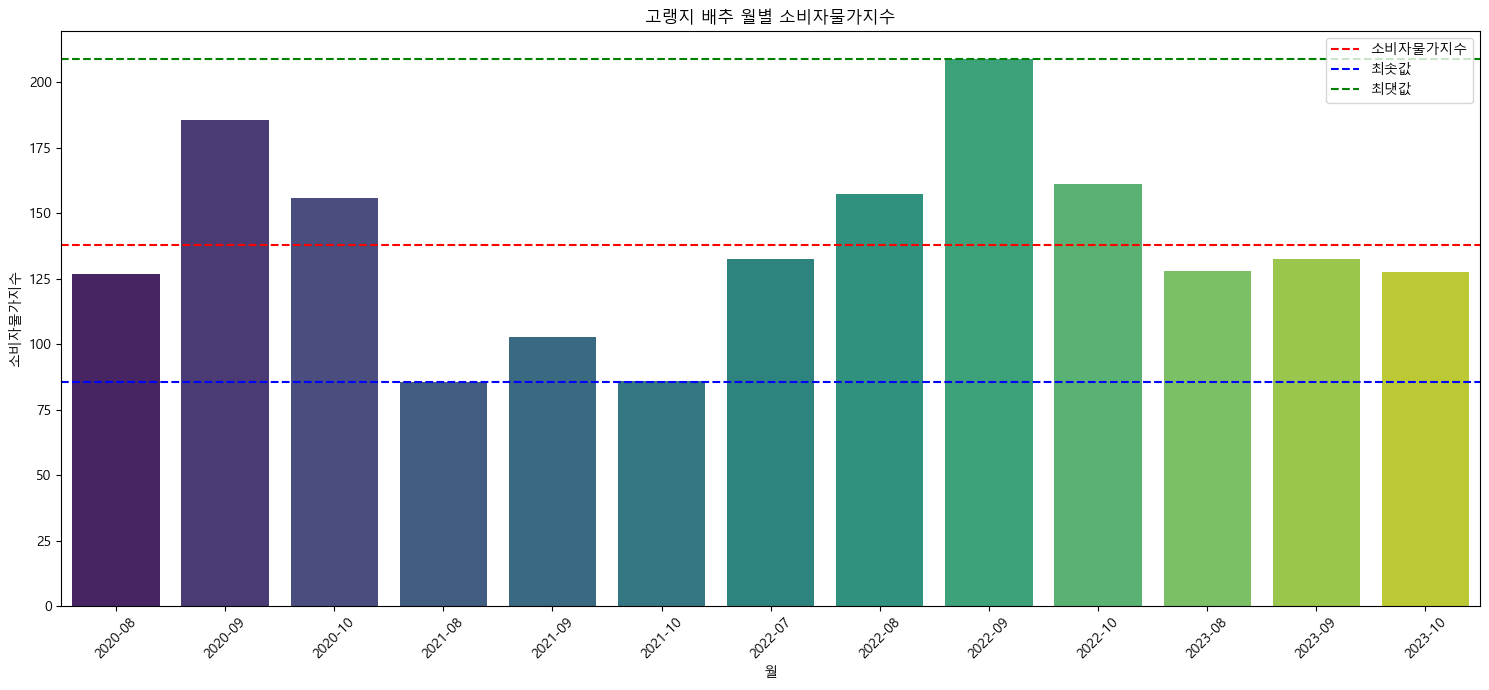

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터프레임 생성 (예시)
# df = pd.read_csv('your_data.csv')  # 실제 데이터 로드

# DATE 열을 datetime 형식으로 변환
df['DATE'] = pd.to_datetime(df['DATE'])

# 월별 평균가격 계산
df['월'] = df['DATE'].dt.to_period('M')  # 월 단위로 변환
monthly_mean_prices = df.groupby('월')['소비자물가지수'].mean().reset_index()

# 월을 datetime 형식으로 변환하여 시각화에 사용
monthly_mean_prices['월'] = monthly_mean_prices['월'].dt.to_timestamp()

plt.rc('font', family='Malgun Gothic')  # Windows의 경우

# 시각화
plt.figure(figsize=(15, 7))
sns.barplot(x='월', y='소비자물가지수', data=monthly_mean_prices, palette='viridis')
plt.title('고랭지 배추 월별 소비자물가지수')
plt.xlabel('월')
plt.ylabel('소비자물가지수')

# 평균가격, 최솟값, 최댓값 계산
average_price = monthly_mean_prices['소비자물가지수'].mean()
min_price = monthly_mean_prices['소비자물가지수'].min()
max_price = monthly_mean_prices['소비자물가지수'].max()

# 평균가격, 최솟값, 최댓값을 기준으로 가로선 추가
plt.axhline(y=average_price, color='red', linestyle='--', label='소비자물가지수')
plt.axhline(y=min_price, color='blue', linestyle='--', label='최솟값')
plt.axhline(y=max_price, color='green', linestyle='--', label='최댓값')

# X축 레이블 수동 설정
plt.xticks(ticks=range(len(monthly_mean_prices)), labels=[date.strftime('%Y-%m') for date in monthly_mean_prices['월']], rotation=45)

plt.legend()  # 범례 추가
plt.tight_layout()  # 레이아웃 조정
plt.show()


In [ ]:
mean_prices = df.groupby('DATE')['생산자물가지수'].mean().reset_index()

plt.rc('font', family='Malgun Gothic')  # Windows의 경우

# 시각화
plt.figure(figsize=(15, 7))
sns.barplot(x='DATE', y='생산자물가지수', data=mean_prices, palette='viridis')
plt.title('고랭지 배추 날짜별 생산자물가지수')
plt.xlabel('DATE')
plt.ylabel('생산자물가지수')

# 평균가격, 최솟값, 최댓값 계산
average_price = mean_prices['생산자물가지수'].mean()
min_price = mean_prices['생산자물가지수'].min()
max_price = mean_prices['생산자물가지수'].max()

# 평균가격, 최솟값, 최댓값을 기준으로 가로선 추가
plt.axhline(y=average_price, color='red', linestyle='--', label='생산자물가지수')
plt.axhline(y=min_price, color='blue', linestyle='--', label='최솟값')
plt.axhline(y=max_price, color='green', linestyle='--', label='최댓값')


# X축 레이블 간격 조정
# 날짜가 불규칙할 경우, 특정 날짜만 선택하여 레이블을 줄임
num_labels = 10  # 표시할 레이블 수
plt.xticks(ticks=range(0, len(mean_prices), len(mean_prices) // num_labels), 
           labels=mean_prices['DATE'][::len(mean_prices) // num_labels].dt.strftime('%Y-%m-%d'), 
           rotation=45)  # 날짜 형식 변경 및 회전

plt.tight_layout()  # 레이아웃 조정
plt.show()

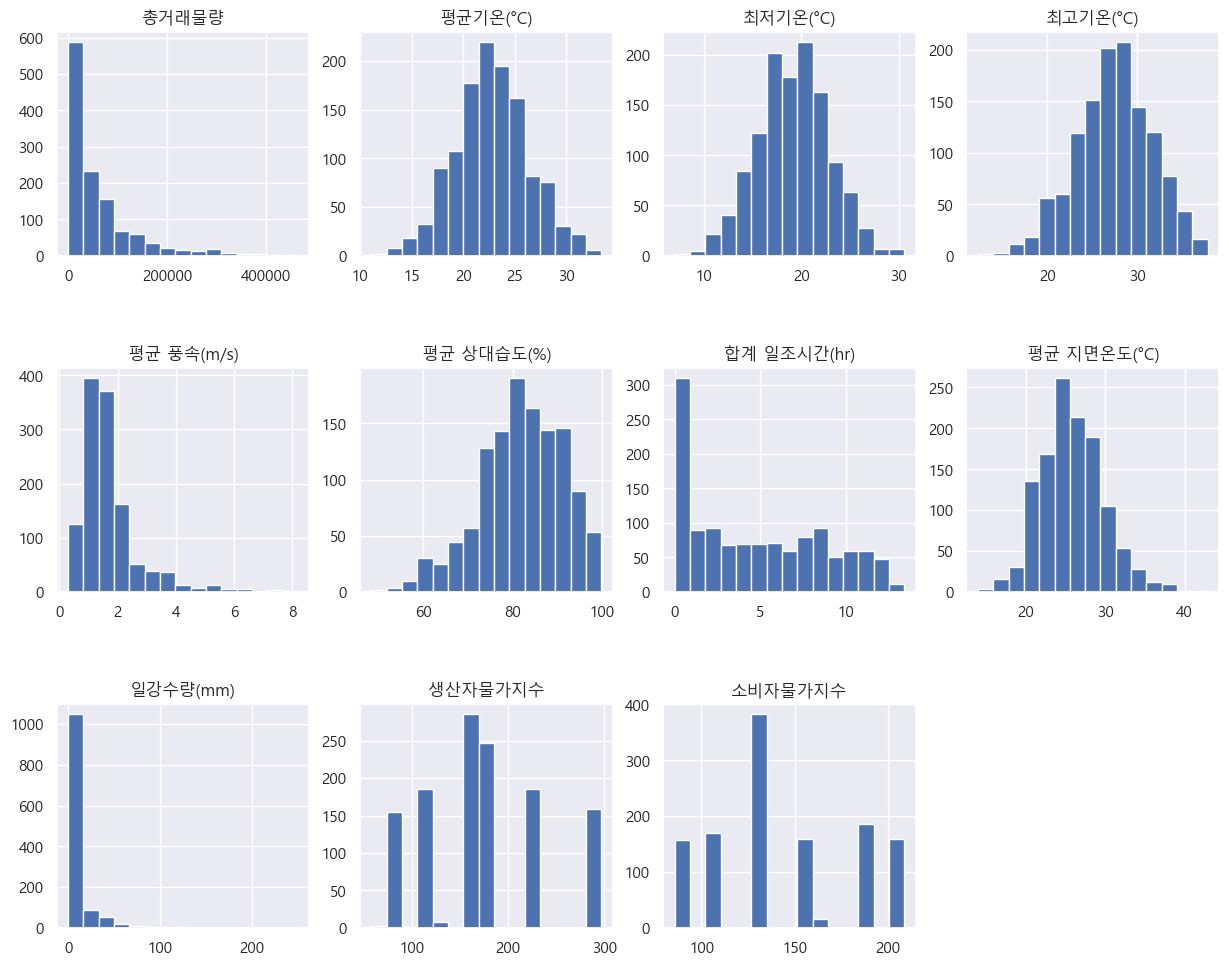

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

numerical_columns = ['총거래물량', '평균기온(°C)', '최저기온(°C)', '최고기온(°C)',
                     '평균 풍속(m/s)', '평균 상대습도(%)', '합계 일조시간(hr)', '평균 지면온도(°C)',
                     '일강수량(mm)', '생산자물가지수', '소비자물가지수']

# 한국어 폰트 설정
plt.rc('font', family='Malgun Gothic')  # Windows의 경우

# 서브플롯 행과 열 지정
num_columns = len(numerical_columns)
num_rows = (num_columns + 2) // 3  # 3열로 설정할 경우 행 수 계산

fig, axes = plt.subplots(num_rows, 4, figsize=(15, num_rows * 4))  # 4열로 서브플롯 생성
axes = axes.flatten()  # 2D 배열을 1D로 변환

# 히스토그램 그리기
for i, column in enumerate(numerical_columns):
    df[column].hist(ax=axes[i], bins=15)  # 각 서브플롯에 히스토그램 그리기
    axes[i].set_title(column)  # 각 서브플롯 제목 설정

# 남은 서브플롯 비우기
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # 남은 서브플롯 삭제

plt.subplots_adjust(hspace=0.5)  # 서브플롯 간격 조정
plt.show()


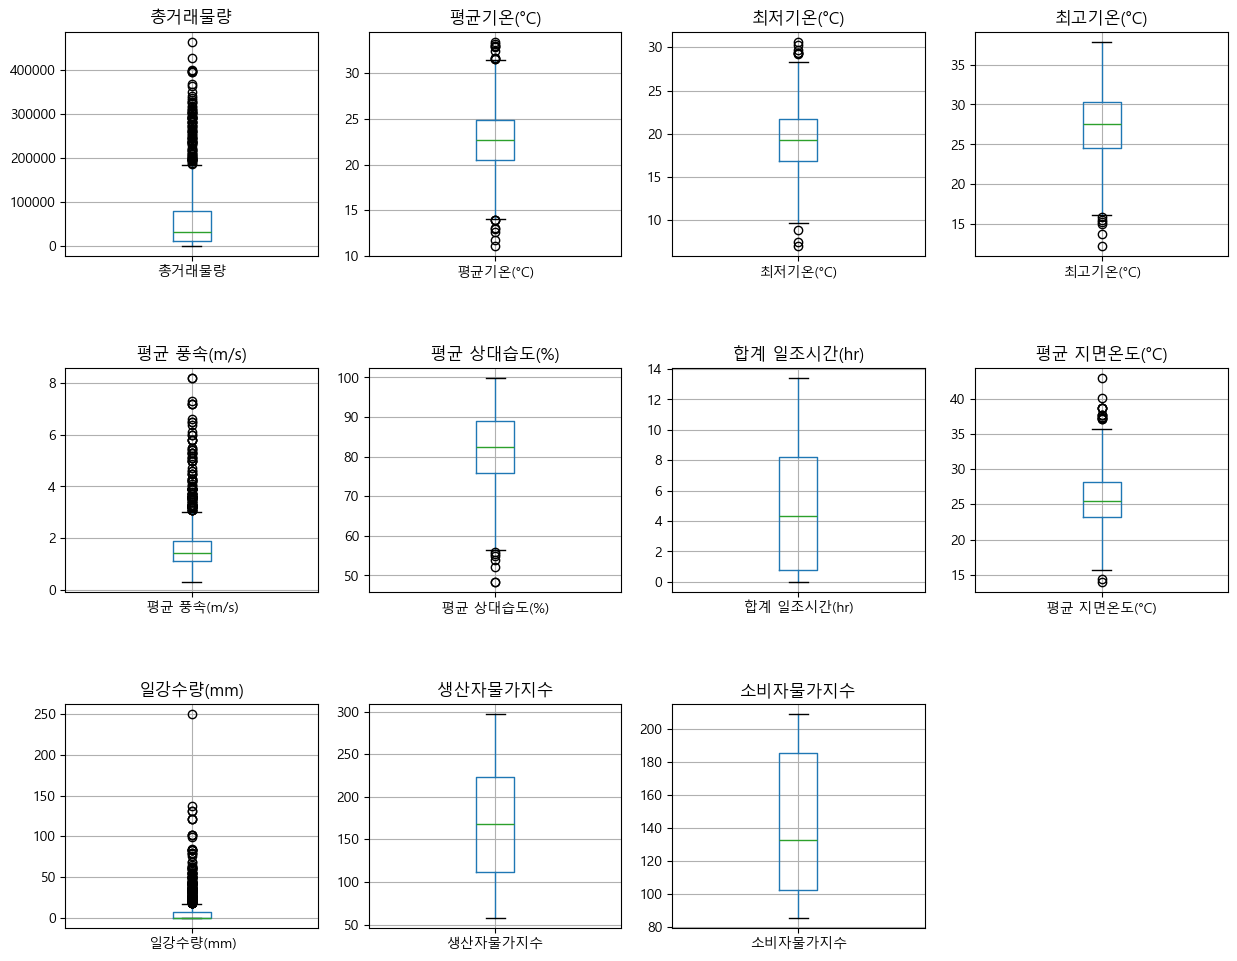

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

numerical_columns = ['총거래물량', '평균기온(°C)', '최저기온(°C)', '최고기온(°C)',
                     '평균 풍속(m/s)', '평균 상대습도(%)', '합계 일조시간(hr)', '평균 지면온도(°C)',
                     '일강수량(mm)', '생산자물가지수', '소비자물가지수']

# 한국어 폰트 설정
plt.rc('font', family='Malgun Gothic')  # Windows의 경우

# 서브플롯 행과 열 지정
num_columns = len(numerical_columns)
num_rows = (num_columns + 2) // 3  # 3열로 설정할 경우 행 수 계산

fig, axes = plt.subplots(num_rows, 4, figsize=(15, num_rows * 4))  # 4열로 서브플롯 생성
axes = axes.flatten()  # 2D 배열을 1D로 변환

# 박스플롯 그리기
for i, column in enumerate(numerical_columns):
    df.boxplot(column=column, ax=axes[i])  # 각 서브플롯에 박스플롯 그리기
    axes[i].set_title(column)  # 각 서브플롯 제목 설정

# 남은 서브플롯 비우기
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # 남은 서브플롯 삭제

plt.subplots_adjust(hspace=0.5)  # 서브플롯 간격 조정
plt.show()


C:\Users\rosie\AppData\Local\Temp\ipykernel_26584\652872924.py:34: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
c:\Users\rosie\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


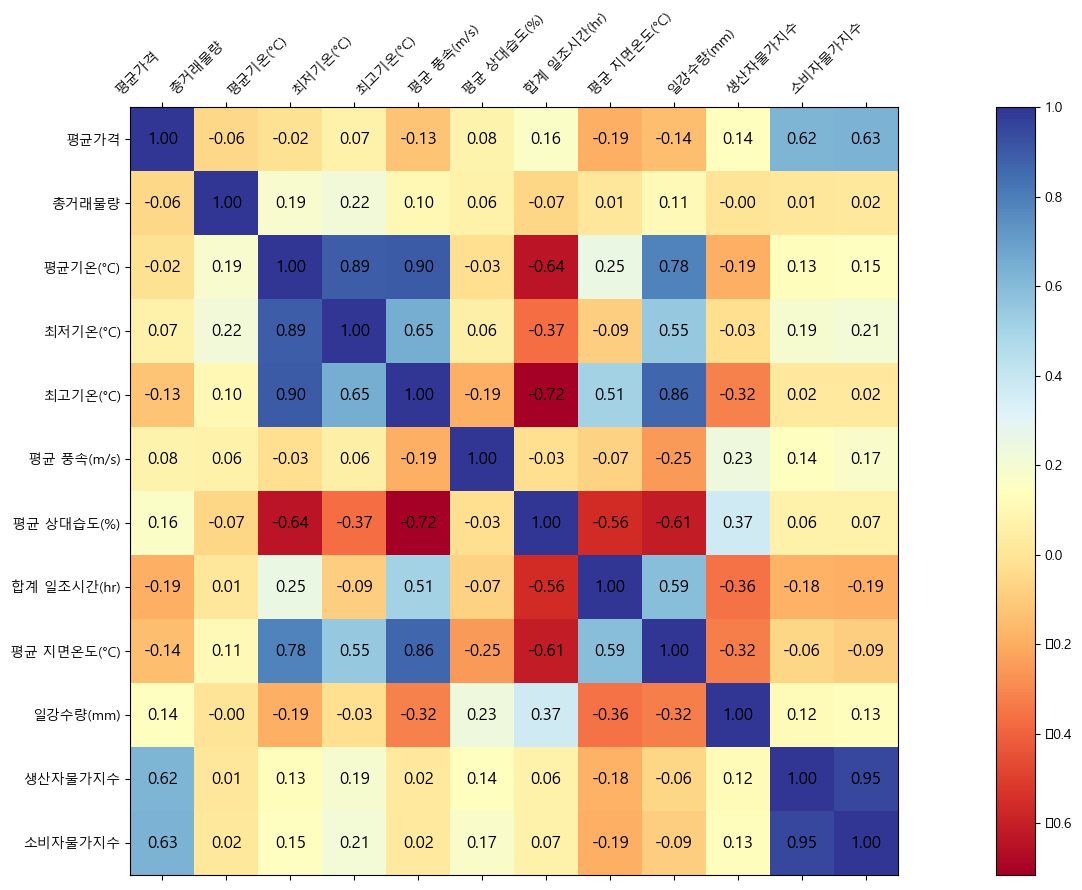

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 한국어 폰트 설정
plt.rc('font', family='Malgun Gothic')  # Windows의 경우


numerical_columns = ['평균가격', '총거래물량', '평균기온(°C)', '최저기온(°C)', '최고기온(°C)',
                     '평균 풍속(m/s)', '평균 상대습도(%)', '합계 일조시간(hr)', '평균 지면온도(°C)',
                     '일강수량(mm)', '생산자물가지수', '소비자물가지수']
corr = df[numerical_columns].corr(method='pearson')

# 히트맵 그리기
fig, ax = plt.subplots(figsize=(20, 9))
cax = ax.matshow(corr, cmap='RdYlBu')

# 색상 바 추가
plt.colorbar(cax)

# 축 레이블 설정
ax.set_xticks(np.arange(len(numerical_columns)))
ax.set_yticks(np.arange(len(numerical_columns)))
ax.set_xticklabels(numerical_columns, rotation=45, ha='right')
ax.set_yticklabels(numerical_columns)

# 각 셀에 상관계수 값 추가
for (i, j), val in np.ndenumerate(corr):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black', fontsize=12)

# 격자 제거
ax.grid(False)

plt.tight_layout()
plt.show()


In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 독립 변수 설정 
X = df.drop(columns=['생산자물가지수','평균 상대습도(%)','평균기온(°C)','최저기온(°C)','평균 지면온도(°C)','대아청과','DATE', '평균가격'])
# VIF 계산 함수
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# VIF 계산
vif_result = calculate_vif(X)
print(vif_result)

      Variable        VIF
0        총거래물량   2.168672
1     최고기온(°C)  20.363759
2   평균 풍속(m/s)   3.909567
3  합계 일조시간(hr)   3.613993
4     일강수량(mm)   1.418497
5      농협가락(공)   1.128062
6         서울청과   1.378918
7         한국청과   1.357033
8      소비자물가지수  14.552237


DATE 변환 성공!

변환된 DATE 컬럼 값 샘플:
0   2023-10-02
1   2023-09-28
2   2023-09-28
3   2023-09-27
4   2023-09-27
Name: DATE, dtype: datetime64[ns]

month 컬럼 고유값:
[10  9  8  7]

One-hot Encoding 후 X 데이터프레임의 컬럼:
['DATE', '총거래물량', '평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '평균 풍속(m/s)', '평균 상대습도(%)', '합계 일조시간(hr)', '평균 지면온도(°C)', '일강수량(mm)', '농협가락(공)', '대아청과', '서울청과', '한국청과', '생산자물가지수', '소비자물가지수', 'month_7', 'month_8', 'month_9', 'month_10']

DATE 컬럼 제거 후 X_reduced 데이터프레임 크기: (1229, 19)

이상치 제거 후 X_reduced 데이터프레임 크기: (1208, 19)

학습 데이터 성능:
RMSE: 4052.2518431221256
MAE: 3154.0389864468075
R²: 0.5250257068299002

테스트 데이터 성능:
RMSE: 3890.291618467808
MAE: 2971.4093458712673
R²: 0.5718125498550074


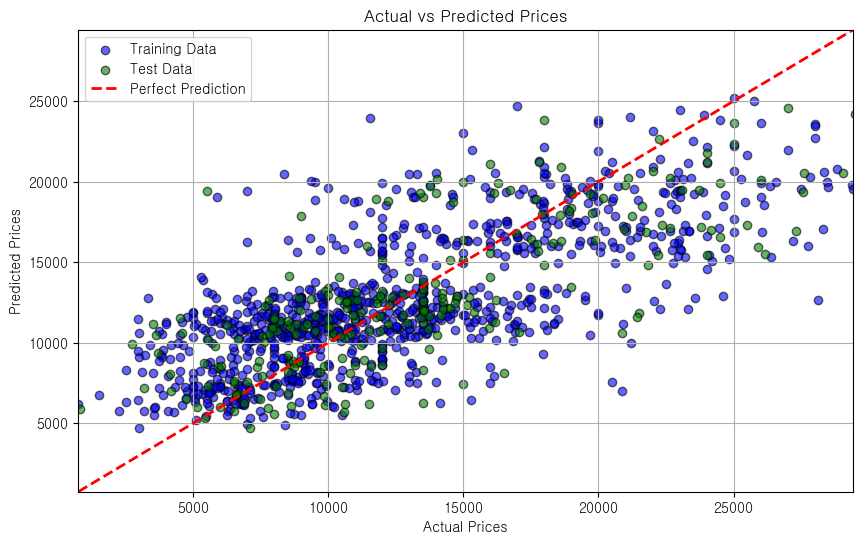

Index(['총거래물량', '평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '평균 풍속(m/s)', '평균 상대습도(%)',
       '합계 일조시간(hr)', '평균 지면온도(°C)', '일강수량(mm)', '농협가락(공)', '대아청과', '서울청과',
       '한국청과', '생산자물가지수', '소비자물가지수', 'month_7', 'month_8', 'month_9',
       'month_10'],
      dtype='object') [  -45.53514529  1439.60066873   -95.26551404 -1899.31216023
  -340.48979297   408.80930352   272.97114038   295.38170809
   142.50923692  -886.22346221  -347.56710444  1207.14461595
  -248.52865629  1680.89643046  2345.92086295   454.37223071
   -45.42799067   -54.24134494   116.88810364]


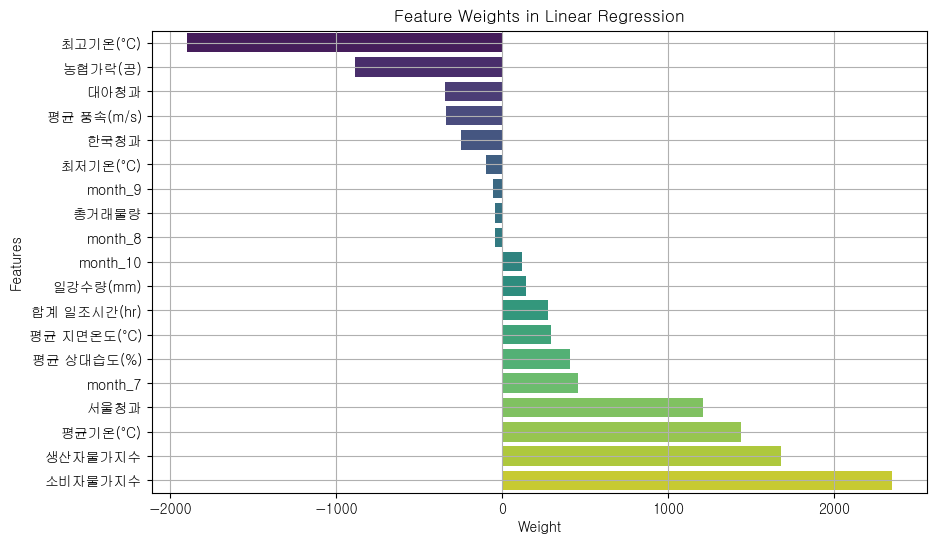

In [ ]:
# linear regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, explained_variance_score


df=pd.read_csv("고냉지배추최종.csv")
# DATE를 datetime 형식으로 변환
# 1. DATE 컬럼 변환 및 점검
# DATE 컬럼을 문자열로 변환 후 datetime 형식으로 변환
X = df.drop(columns=['평균가격'])  # 독립 변수
X['DATE'] = pd.to_datetime(X['DATE'].astype(str), format='%Y%m%d', errors='coerce')

# 변환 실패 확인
if X['DATE'].isna().sum() > 0:
    print(f"DATE 변환 실패한 값 개수: {X['DATE'].isna().sum()}")
else:
    print("DATE 변환 성공!")

# 변환 후 DATE 컬럼 확인
print("\n변환된 DATE 컬럼 값 샘플:")
print(X['DATE'].head())

# 2. month 파생 변수 생성
X['month'] = X['DATE'].dt.month
print("\nmonth 컬럼 고유값:")
print(X['month'].unique())

# 3. One-hot Encoding으로 month 컬럼 더미변수화
X = pd.get_dummies(X, columns=['month'], drop_first=False)
print("\nOne-hot Encoding 후 X 데이터프레임의 컬럼:")
print(X.columns.tolist())

# 4. DATE 컬럼 제거
X_reduced = X.drop(columns=['DATE'])
print("\nDATE 컬럼 제거 후 X_reduced 데이터프레임 크기:", X_reduced.shape)

y = df['평균가격']

# 5. 이상치 제거
# IQR 방법을 사용하여 이상치 제거
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 제거
mask = (y >= lower_bound) & (y <= upper_bound)
X_reduced = X_reduced[mask]
y = y[mask]


print("\n이상치 제거 후 X_reduced 데이터프레임 크기:", X_reduced.shape)

# 데이터 전처리: 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

# 데이터프레임을 날짜 기준으로 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성
lr_model = LinearRegression()

# 모델 학습
lr_model.fit(X_train, y_train)

# 예측
y_train_pred = lr_model.predict(X_train)  # 학습 데이터 예측
y_test_pred = lr_model.predict(X_test)    # 테스트 데이터 예측

# 학습 데이터 성능 평가
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)  # 학습 데이터 RMSE
train_mae = mean_absolute_error(y_train, y_train_pred)                # 학습 데이터 MAE
train_r2 = r2_score(y_train, y_train_pred)                            # 학습 데이터 R²

# 테스트 데이터 성능 평가
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)  # 테스트 데이터 RMSE
test_mae = mean_absolute_error(y_test, y_test_pred)                # 테스트 데이터 MAE
test_r2 = r2_score(y_test, y_test_pred)                            # 테스트 데이터 R²

# 결과 출력
print("\n학습 데이터 성능:")
print(f"RMSE: {train_rmse}")
print(f"MAE: {train_mae}")
print(f"R²: {train_r2}")

print("\n테스트 데이터 성능:")
print(f"RMSE: {test_rmse}")
print(f"MAE: {test_mae}")
print(f"R²: {test_r2}")

# 한국어 폰트 설정
plt.rc('font', family='Gulim')  # Windows의 경우

# 시각화
plt.figure(figsize=(10, 6))

# 훈련 데이터 시각화
plt.scatter(y_train,  y_train_pred, alpha=0.6, color='blue', label='Training Data', edgecolors='k')

# 테스트 데이터 시각화
plt.scatter(y_test, y_test_pred, alpha=0.6, color='green', label='Test Data', edgecolors='k')

# y=x 선 추가
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Perfect Prediction')

# 그래프 제목 및 레이블 설정
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.xlim(y_train.min(), y_train.max())
plt.ylim(y_train.min(), y_train.max())
plt.legend()
plt.grid()

# 그래프 출력
plt.show()

# 가중치 시각화
weights = lr_model.coef_
feature_names = X_reduced.columns
print(feature_names,weights)

# 가중치를 크기별로 오름차순 정리
sorted_indices = np.argsort(weights)  # 가중치의 인덱스를 정렬
sorted_weights = weights[sorted_indices]  # 정렬된 가중치
sorted_feature_names = feature_names[sorted_indices]  # 정렬된 특성 이름

# 정렬된 가중치 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_weights, y=sorted_feature_names, palette='viridis')
plt.title('Feature Weights in Linear Regression')
plt.xlabel('Weight')
plt.ylabel('Features')
plt.grid()
plt.show()


c:\Users\rosie\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\rosie\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(



학습 데이터 성능:
RMSE: 3715.547342241867
MAE: 2799.359621572415
R²: 0.6508771297351521

테스트 데이터 성능:
RMSE: 4140.181699504458
MAE: 3025.022477854533
R²: 0.603272511984297


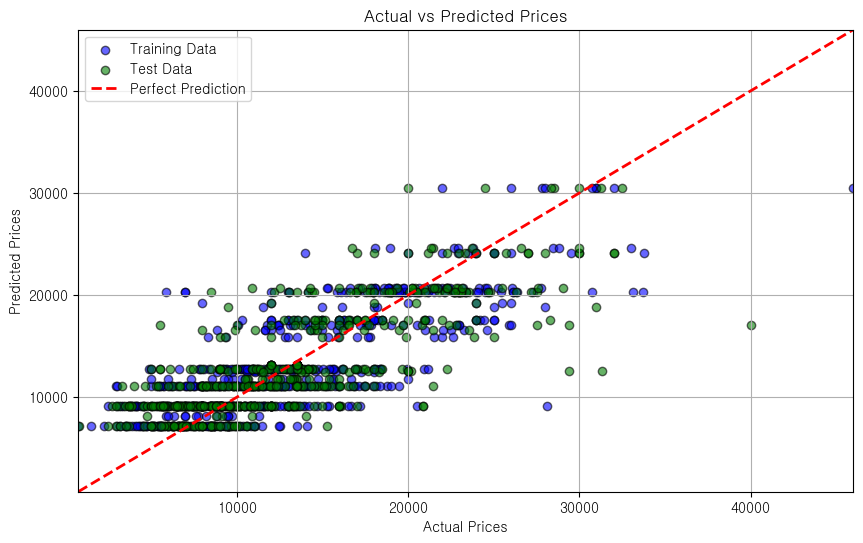

Index(['총거래물량', '평균기온(°C)', '최저기온(°C)', '평균 풍속(m/s)', '평균 상대습도(%)', '농협가락(공)',
       '서울청과', '생산자물가지수', '소비자물가지수'],
      dtype='object') [0.01101003 0.02231003 0.05248466 0.03743304 0.0330636  0.02400536
 0.10668315 0.69020805 0.02280208]


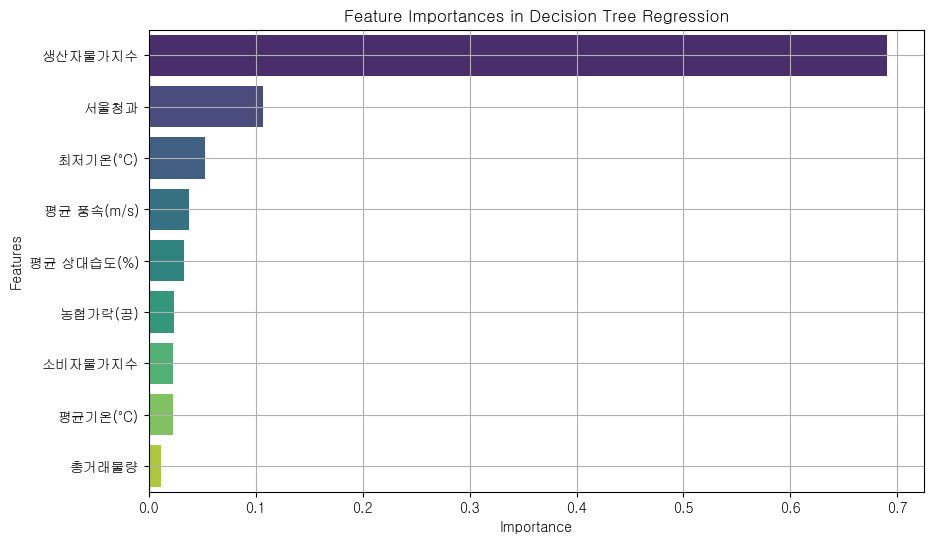

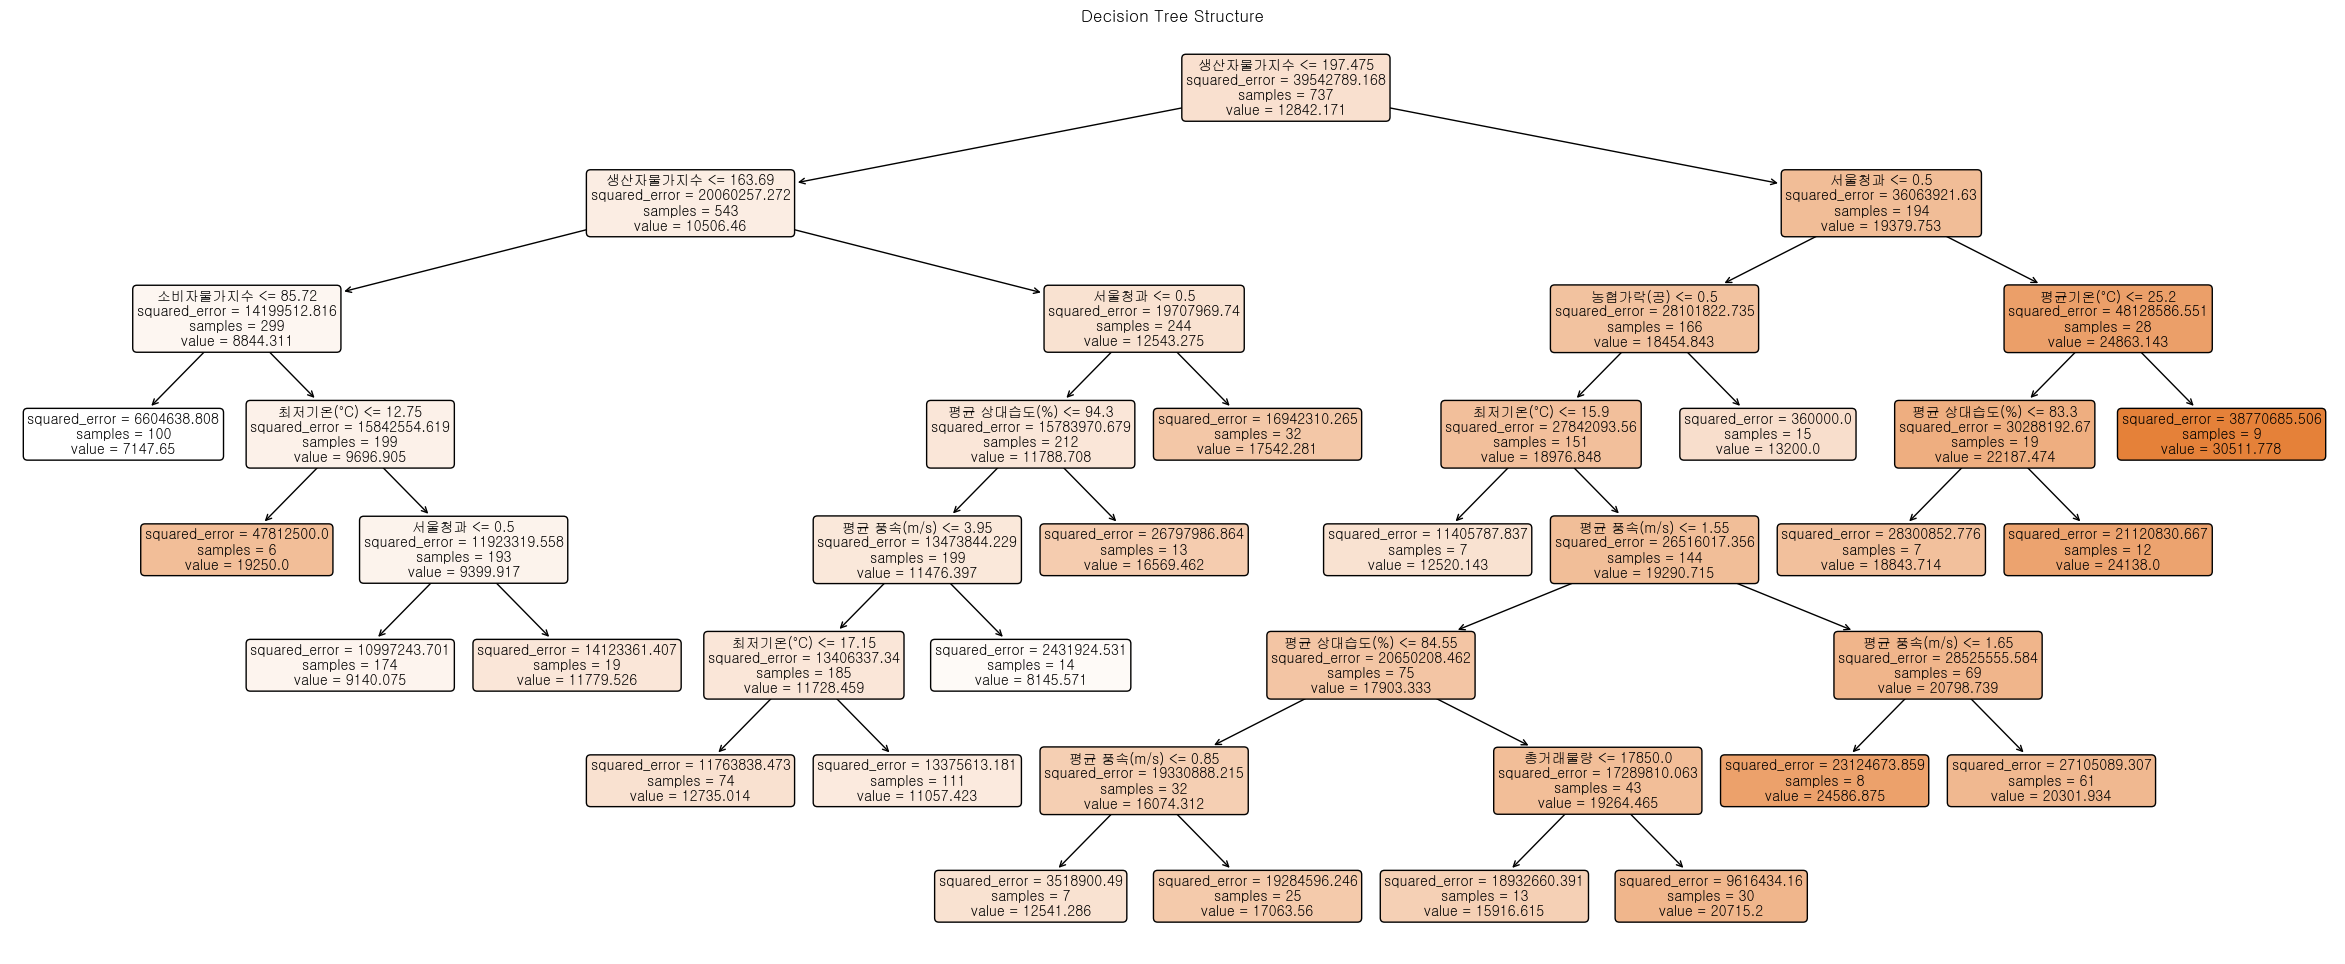

In [48]:
#decision tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, explained_variance_score
from sklearn.tree import plot_tree



X = df.drop(columns=['DATE','평균가격'])  # 독립 변수
y = df['평균가격']

# 데이터 전처리: 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터프레임을 날짜 기준으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)



# 하이퍼파라미터 그리드 확장
param_dist = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30, 40],
    'min_impurity_decrease': [0.0, 0.01, 0.1]
}

# 결정 트리 모델 생성
dt_model = DecisionTreeRegressor(min_samples_split= 5, min_samples_leaf= 6, min_impurity_decrease= 0.0, max_leaf_nodes= 20, max_features= 'auto', max_depth= None,random_state=42)

# 모델 학습
dt_model.fit(X_train, y_train)



# 특성 중요도 시각화
feature_importances = dt_model.feature_importances_
feature_names = X.columns  # 원래의 X 데이터프레임에서 컬럼 이름 가져오기

# 중요도 정렬
sorted_indices = np.argsort(feature_importances)[::-1]  # 내림차순 정렬
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# 중요도가 0.01 이상인 특성만 필터링
important_features = sorted_feature_names[sorted_importances > 0.01]
important_indices = np.where(feature_importances > 0.01)[0]

# 필터링된 특성으로 새로운 데이터프레임 생성
X_important = X.iloc[:, important_indices]

# 데이터프레임을 날짜 기준으로 분할
X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.4, random_state=42)

# 결정 트리 모델 생성
dt_model = DecisionTreeRegressor(min_samples_split=5, min_samples_leaf=6, min_impurity_decrease=0.0, 
                                  max_leaf_nodes=20, max_features='auto', max_depth=None, random_state=42)

# 모델 학습
dt_model.fit(X_train, y_train)

# 예측
y_train_pred = dt_model.predict(X_train)  # 학습 데이터 예측
y_test_pred = dt_model.predict(X_test)    # 테스트 데이터 예측

# 학습 데이터 성능 평가
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)  # 학습 데이터 RMSE
train_mae = mean_absolute_error(y_train, y_train_pred)                # 학습 데이터 MAE
train_r2 = r2_score(y_train, y_train_pred)                            # 학습 데이터 R²

# 테스트 데이터 성능 평가
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)  # 테스트 데이터 RMSE
test_mae = mean_absolute_error(y_test, y_test_pred)                # 테스트 데이터 MAE
test_r2 = r2_score(y_test, y_test_pred)                            # 테스트 데이터 R²

# 결과 출력
print("\n학습 데이터 성능:")
print(f"RMSE: {train_rmse}")
print(f"MAE: {train_mae}")
print(f"R²: {train_r2}")

print("\n테스트 데이터 성능:")
print(f"RMSE: {test_rmse}")
print(f"MAE: {test_mae}")
print(f"R²: {test_r2}")

# 훈련 데이터 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.6, color='blue', label='Training Data', edgecolors='k')

# 테스트 데이터 시각화
plt.scatter(y_test, y_test_pred, alpha=0.6, color='green', label='Test Data', edgecolors='k')

# y=x 선 추가
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Perfect Prediction')

# 그래프 제목 및 레이블 설정
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.xlim(y_train.min(), y_train.max())
plt.ylim(y_train.min(), y_train.max())
plt.legend()
plt.grid()

# 그래프 출력
plt.show()

# 중요도 시각화
feature_importances = dt_model.feature_importances_
feature_names = X_important.columns  # 필터링된 X 데이터프레임에서 컬럼 이름 가져오기
print(feature_names, feature_importances)
# 중요도 정렬
sorted_indices = np.argsort(feature_importances)[::-1]  # 내림차순 정렬
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_feature_names, palette='viridis')
plt.title('Feature Importances in Decision Tree Regression')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid()
plt.show()

# 의사결정 나무 시각화
plt.figure(figsize=(30, 12))  # 높이를 늘려서 텍스트가 겹치지 않도록 설정
plot_tree(dt_model, 
          feature_names=X_important.columns, 
          filled=True, 
          rounded=True, 
          fontsize=10,  # 폰트 크기 조정
          node_ids=False,  # 노드 ID 표시
          proportion=False)  # 비율 표시하지 않음
plt.title('Decision Tree Structure')
plt.show()